# Clustering Assignments

## 1. K-Means Clustering

In [1]:
# 1. Read in the cereal.csv file
import pandas as pd

df = pd.read_csv('./data/cereal.csv')
df.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,100%_Bran,Nabisco,70,4,1,6,25
1,100%_Natural_Bran,Quaker Oats,120,3,5,8,0
2,All-Bran,Kelloggs,70,4,1,5,25
3,All-Bran_with_Extra_Fiber,Kelloggs,50,4,0,0,25
4,Almond_Delight,Ralston Purina,110,2,2,8,25


In [2]:
# 2. Prep the data by dropping the name and manufacturer columns: aka only keep the numeric columns
data = df.select_dtypes(exclude=['object'])
data.head()

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,70,4,1,6,25
1,120,3,5,8,0
2,70,4,1,5,25
3,50,4,0,0,25
4,110,2,2,8,25


In [3]:
# 3. Fit a K-Means Clustering model with 2 clusters
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, n_init='auto')
kmeans2.fit(data)

KMeans(n_clusters=2, n_init='auto')

In [4]:
round(pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns),1)

,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals
0,104.6,2.5,1.0,6.8,22.1
1,116.7,2.7,0.8,6.3,100.0


<Axes: >

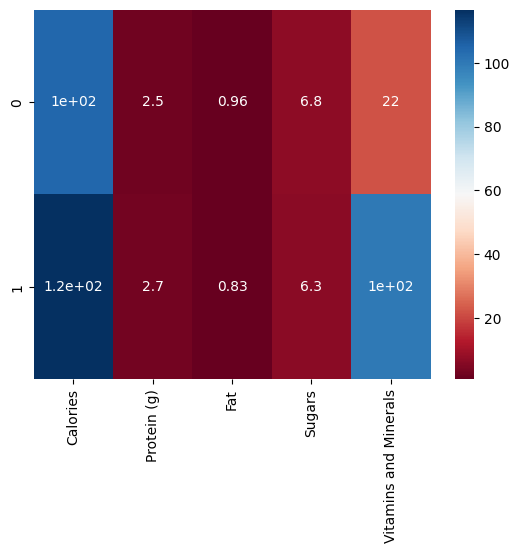

In [5]:
# 4. Interpret the cluster centers
import seaborn as sns

cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True)

* Cluster 1: **Low in Vitamins and Minerals (Cereal for Kids)**
* Cluster 2: **High in Calories, Vitamins and Minerals (Cereal for Adults)**

## 2. Inertia Plot

In [6]:
# 1. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
from tqdm import tqdm

# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 15 clusters, and add the intertia scores to the list
for k in tqdm(range(2, 16)):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

100%|██████████| 14/14 [00:00<00:00, 288.36it/s]


Text(0.5, 1.0, 'Number of Clusters vs. Inertia')

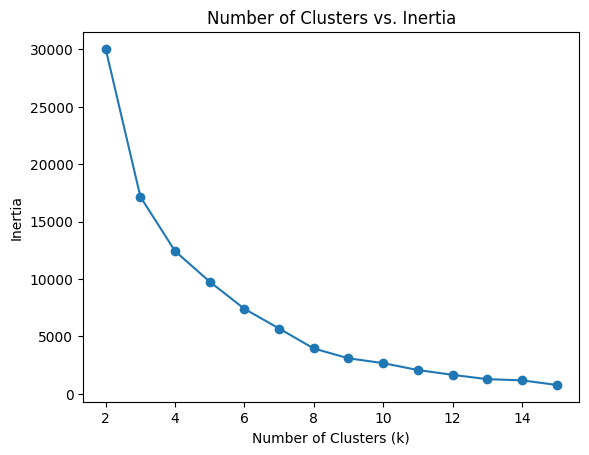

In [7]:
# 2. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia")

In [8]:
a = pd.DataFrame(inertia_values, index=range(2, 16), columns=["Inertia"])
a["lag_1"] = a["Inertia"].shift(-1)
a["Diff Factor"] = round(a["Inertia"] / a["lag_1"],1)
a

,Inertia,lag_1,Diff Factor
2,30041.730392,17167.537634,1.7
3,17167.537634,12430.331667,1.4
4,12430.331667,9765.241667,1.3
5,9765.241667,7403.834046,1.3
6,7403.834046,5690.000712,1.3
7,5690.000712,3951.448148,1.4
8,3951.448148,3097.281481,1.3
9,3097.281481,2676.448148,1.2
10,2676.448148,2078.190572,1.3
11,2078.190572,1657.570053,1.3


In [9]:
# 3. Identify the elbow of the plot
## Identify the elbow of the plot: biggest drop seems to be at 3 clusters

In [10]:
# 4. Fit a K-Means Clustering model on the specific number of clusters at the elbow
from sklearn.cluster import KMeans

kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=456)
kmeans3.fit(data)

KMeans(n_clusters=3, n_init='auto', random_state=456)

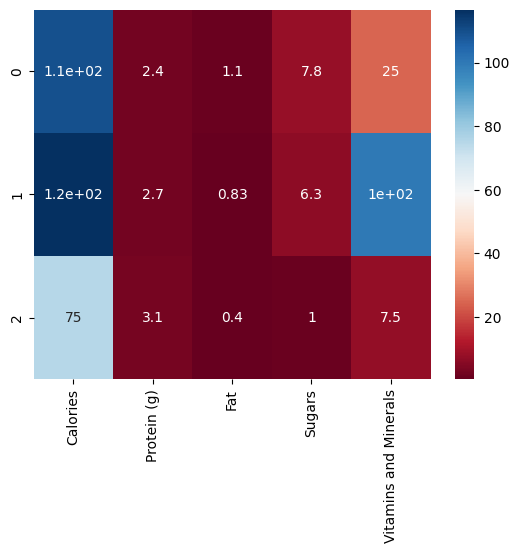

In [11]:
# 5. Interpret the cluster centers using a heat map
import seaborn as sns

cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)
sns.heatmap(cluster_centers3, cmap='RdBu', annot=True);

* Cluster 0: **In the Middle (Typical Cereals)**
* Cluster 1: **High in Calories & Vitamins and Minerals (Hearty Cereals)**
* Cluster 2: **Average/Low in Calories & Vitamins and Minerals (Empty Cereals)**

## 3. Tune the K-Means Model

In [12]:
# 1. Remove the ”Fat” column
data_subset = data[['Calories', 'Protein (g)', 'Sugars', 'Vitamins and Minerals']]
data_subset.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,70,4,6,25
1,120,3,8,0
2,70,4,5,25
3,50,4,0,25
4,110,2,8,25


In [13]:
# 2. Standardize the remaining columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_ft = scaler.fit_transform(data_subset)
data_scaled = pd.DataFrame(scaler_ft, columns=data_subset.columns)
data_scaled.head()

,Calories,Protein (g),Sugars,Vitamins and Minerals
0,-1.940286,1.387392,-0.173586,-0.149270
1,0.789394,0.462464,0.277129,-1.253871
2,-1.940286,1.387392,-0.398944,-0.149270
3,-3.032158,1.387392,-1.525731,-0.149270
4,0.243458,-0.462464,0.277129,-0.149270


In [14]:
# 3a. Write a loop to fit K-Means Clustering models with 2 to 15 clusters
inertia_values_scaled = []

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_scaled)
    inertia_values_scaled.append(kmeans.inertia_)

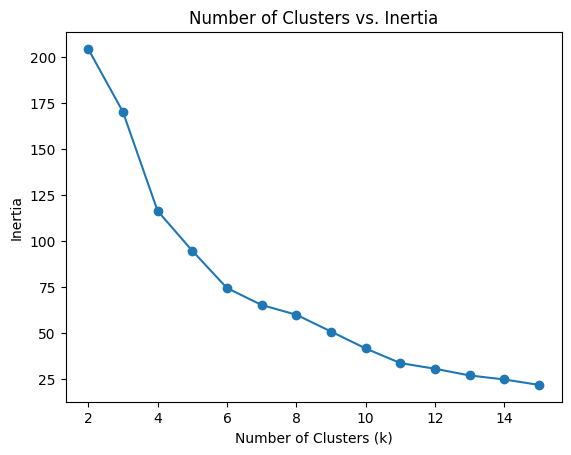

In [15]:
# 3b. Create a plot with the number of clusters on the x-axis and the inertia on the y-axis

# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series_scaled = pd.Series(inertia_values_scaled, index=range(2, 16))

# plot the data
inertia_series_scaled.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [17]:
a = pd.DataFrame(inertia_series_scaled, index=range(2, 16), columns=["Inertia"])
a["lag_1"] = a["Inertia"].shift(-1)
a["Diff Factor"] = round(a["Inertia"] - a["lag_1"],1)
a

,Inertia,lag_1,Diff Factor
2,204.646486,170.493580,34.2
3,170.493580,116.632186,53.9
4,116.632186,94.963165,21.7
5,94.963165,74.710329,20.3
6,74.710329,65.489968,9.2
7,65.489968,60.193100,5.3
8,60.193100,51.072112,9.1
9,51.072112,41.851751,9.2
10,41.851751,33.907917,7.9
11,33.907917,30.832277,3.1


In [18]:
# 3c. Identify the elbow of the plot: let's look at 6 clusters


In [19]:
# 3d. Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=42)
kmeans6.fit(data_scaled)

KMeans(n_clusters=6, n_init='auto', random_state=42)

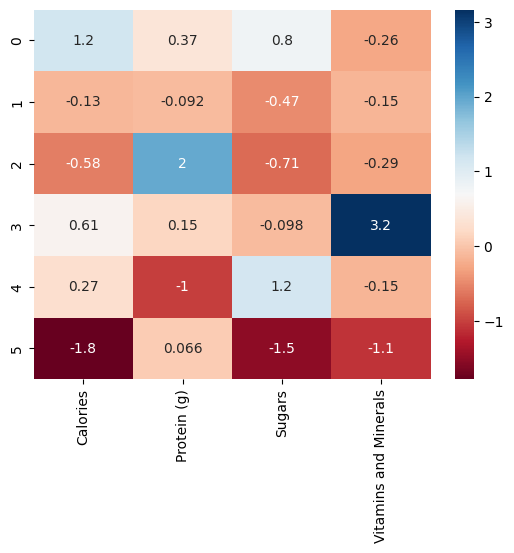

In [20]:
# 3e. Interpret the cluster centers using a heat map
import seaborn as sns
cluster_centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=data_scaled.columns)
sns.heatmap(cluster_centers6, cmap='RdBu', annot=True);

* Cluster 0: **High Calories + Sguar**
* Cluster 1: **Typical Cereals**
* Cluster 2: **High Protein**
* Cluster 3: **High Vitamins and Minerals**
* Cluster 4: **High Sugar, Low Protein**
* Cluster 5: **Low Calories + Sugar + Vitamins and Minerals**

## 4. Select the Best K-Means Model

In [26]:
# 1. Label each row in your original data set with a cluster name from the unstandardized data model and a cluster name from standardized data model
# model 1: assign the cluster name to each row
model1_clusters = pd.Series(kmeans3.labels_, name='model1_clusters')
model1_names = model1_clusters.map({0: 'Typical Cereals',
                                        1: 'Hearty Cereals',
                                        2: 'Empty Cereals'})
model1_names.value_counts()

model1_clusters
Typical Cereals    58
Empty Cereals      10
Hearty Cereals      6
Name: count, dtype: int64

In [23]:
# 2. Look at the number of cereals that fall into each cluster
# model 2: assign the cluster name to each row
model2_clusters = pd.Series(kmeans6.labels_, name='model2_clusters')
model2_names = model2_clusters.map({0: 'High Calories + Sugar',
                                    1: 'Typical Cereals',
                                    2: 'High Protein',
                                    3: 'High Vitamins and Minerals',
                                    4: 'High Sugar, Low Protein',
                                    5: 'Low Calories + Sugar + Vitamins and Minerals'})
model2_names.value_counts()

model2_clusters
Typical Cereals                                 25
High Sugar, Low Protein                         18
High Calories + Sugar                           10
High Protein                                     8
Low Calories + Sugar + Vitamins and Minerals     7
High Vitamins and Minerals                       6
Name: count, dtype: int64

In [24]:
# 3. Decide on the best model for our client
# Model 1 has most cereals in a single cluster vs Model 2 has a better distribution, so let's go with Model 2

In [ ]:
# 4. Recommend a specific number of displays


**Original Goal**: Help our client, Maven Supermarket, set up cereal displays around their store based on various niches of cereals

**Our Recommendation**: Create 3 displays for:
* Typical cereal
* Sugary cereal
* Healthy cereal

In [ ]:
# 5. Suggest a few cereals that should be shown in each display


#### 1. Typical cereals to display in the cereal aisle

In [55]:
# combine the cluster names (Series) with the original data set
cluster_names = pd.concat([df, model1_names, model2_names], axis=1)

In [35]:
# view the typical cereals
cereal_typical = cluster_names[cluster_names.model2_clusters == 'Typical Cereals']
cereal_typical.head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
4,Almond_Delight,Ralston Purina,110,2,2,8,25,Typical Cereals,Typical Cereals
8,Bran_Chex,Ralston Purina,90,2,1,6,25,Typical Cereals,Typical Cereals
9,Bran_Flakes,Post,90,3,0,5,25,Typical Cereals,Typical Cereals
13,Clusters,General Mills,110,3,2,7,25,Typical Cereals,Typical Cereals
15,Corn_Chex,Ralston Purina,110,2,0,3,25,Typical Cereals,Typical Cereals


In [33]:
# view the top manufacturers
cluster_names.Manufacturer.value_counts()

Manufacturer
Kelloggs                       23
General Mills                  22
Quaker Oats                     8
Post                            8
Nabisco                         6
Ralston Purina                  6
American Home Food Products     1
Name: count, dtype: int64

In [44]:
# select one cereal from each major manufacturer -- maybe corn flakes and cheerios
# cereal_typical[cereal_typical.Manufacturer.isin(['Kelloggs', 'General Mills'])].head()
cereal_typical.groupby(["Manufacturer"]).sample(n=1, random_state=12)

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
69,Triples,General Mills,110,2,1,3,25,Typical Cereals,Typical Cereals
16,Corn_Flakes,Kelloggs,100,2,0,2,25,Typical Cereals,Typical Cereals
65,Strawberry_Fruit_Wheats,Nabisco,90,2,0,5,25,Typical Cereals,Typical Cereals
31,Grape_Nuts_Flakes,Post,100,3,1,5,25,Typical Cereals,Typical Cereals
15,Corn_Chex,Ralston Purina,110,2,0,3,25,Typical Cereals,Typical Cereals


#### 2. Sugary cereals to display near the snacks & candy aisle

In [52]:
# view the sugary cereals
# cereal_sugary = cluster_names[cluster_names.model2_clusters.isin(['High Calories + Sugar',
#                                                                   'High Sugar, Low Protein'])]
cereal_sugary = cluster_names[cluster_names.model2_clusters.str.contains('Sugar')]

In [53]:
# sort by most sugar -- maybe golden crisp and smacks
cereal_sugary.sort_values('Sugars', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
63,Smacks,Kelloggs,110,2,1,15,25,Typical Cereals,"High Sugar, Low Protein"
29,Golden_Crisp,Post,100,2,0,15,25,Typical Cereals,"High Sugar, Low Protein"
6,Apple_Jacks,Kelloggs,110,2,0,14,25,Typical Cereals,"High Sugar, Low Protein"
49,Post_Nat._Raisin_Bran,Post,120,3,1,14,25,Typical Cereals,High Calories + Sugar
43,Mueslix_Crispy_Blend,Kelloggs,160,3,2,13,25,Typical Cereals,High Calories + Sugar


#### 3. Healthy cereals to display near the healthy foods aisle

In [58]:
cereal_healthy = cluster_names[(cluster_names.model2_clusters.str.contains('High Protein|Vitamins and Minerals', regex=True))]
cereal_healthy.model2_clusters.value_counts()

model2_clusters
High Protein                                    8
Low Calories + Sugar + Vitamins and Minerals    7
High Vitamins and Minerals                      6
Name: count, dtype: int64

In [59]:
# sort by most protein -- maybe cheerios and special k
cereal_healthy.sort_values('Protein (g)', ascending=False).head()

,Cereal Name,Manufacturer,Calories,Protein (g),Fat,Sugars,Vitamins and Minerals,model1_clusters,model2_clusters
11,Cheerios,General Mills,110,6,2,1,25,Typical Cereals,High Protein
64,Special_K,Kelloggs,110,6,0,3,25,Typical Cereals,High Protein
54,Quaker_Oatmeal,Quaker Oats,100,5,2,-1,0,Empty Cereals,High Protein
0,100%_Bran,Nabisco,70,4,1,6,25,Empty Cereals,High Protein
53,Quaker_Oat_Squares,Quaker Oats,100,4,1,6,25,Typical Cereals,High Protein


## 5. Hierarchical Clustering

In [ ]:
# 1. Create a dendrogram using the 5 numeric fields of the cereal data set


In [ ]:
# 2. Visually identify the ”best” number of clusters and adjust the color_threshold


In [ ]:
# 3. Create a dendrogram using the 4 numeric, standardized fields (excluding “Fat”) of the cereal data set


In [ ]:
# 4. Visually identify the ”best” number of clusters and adjust the color_threshold


In [ ]:
# 5. Fit an agglomerative clustering model on the scaled data set with four clusters and view the labels


In [ ]:
# 6. Create a cluster map of the “best” results and interpret the clusters


## 6. DBSCAN

In [ ]:
# 1. Copy over the function that loops through multiple eps and min_samples values to fit multiple DBSCAN models


In [ ]:
# 2. Apply the function on both the original and standardized data sets


In [ ]:
# 3. Find the highest silhouette score and note down the eps and min_samples values


In [ ]:
# 4. Fit a final DBSCAN model with those eps and min_samples values and view the labels
